In [ ]:
# Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Convert excel file generated by API to a Pandas dataframe.
df = pd.read_excel('/Users/kim/Desktop/EPA_EV_EnginePackage .xlsx')
# df.shape
df.head()




,Vehicle Type,Engine Package,Model Year,Production (000),Production Share,2-Cycle MPG,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),...,Ton-MPG (Real-World),Drivetrain - Front,Drivetrain - 4WD,Drivetrain - Rear,Transmission - Manual,Transmission - Automatic,Transmission - Lockup,Transmission - CVT (Hybrid),Transmission - Other,Transmission - CVT (Non-Hybrid)
0,Sedan/Wagon,EV/PHEV/FCV,1986,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,Sedan/Wagon,EV/PHEV/FCV,1987,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,Sedan/Wagon,EV/PHEV/FCV,1988,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,Sedan/Wagon,EV/PHEV/FCV,1989,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,Sedan/Wagon,EV/PHEV/FCV,1990,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


array(['Sedan/Wagon', 'Car SUV', 'Minivan/Van'], dtype=object)

In [ ]:
# Clean data
# df["Vehicle Type"].unique()

# Create a mask where Vehicle Type column does not contain TruckSUV or Pickup
mask = ~df['Vehicle Type'].str.contains('Truck SUV|Pickup', case=False, na=False)

# Apply the mask to the DataFrame
cotwo_by_cfe_df = df[mask]

cotwo_by_cfe_df['Vehicle Type'].unique() 

In [ ]:
#Select columns

cotwo_by_cfe_df = cotwo_by_cfe_df[['Real-World CO2 (g/mi)', 'Real-World MPG']]
# cotwo_by_cfe_df.head()

#Convert all columns in DataFrame to strings
cotwo_by_cfe_df.columns = cotwo_by_cfe_df.columns.astype(str)

# Convert columns to numeric.  Error=coerce changes any data to NaN that cannot be converted
cotwo_by_cfe_df['Real-World CO2 (g/mi)'] = pd.to_numeric(cotwo_by_cfe_df['Real-World CO2 (g/mi)'], errors='coerce')
cotwo_by_cfe_df['Real-World MPG'] = pd.to_numeric(cotwo_by_cfe_df['Real-World MPG'], errors='coerce')


# Drop any rows that have NaN values after conversion
cotwo_by_cfe_df = cotwo_by_cfe_df.dropna()

# Checking for missing data
missing_data = cotwo_by_cfe_df['Real-World CO2 (g/mi)'].isnull().sum()
print("Missing data: ", missing_data)



Missing data:  0


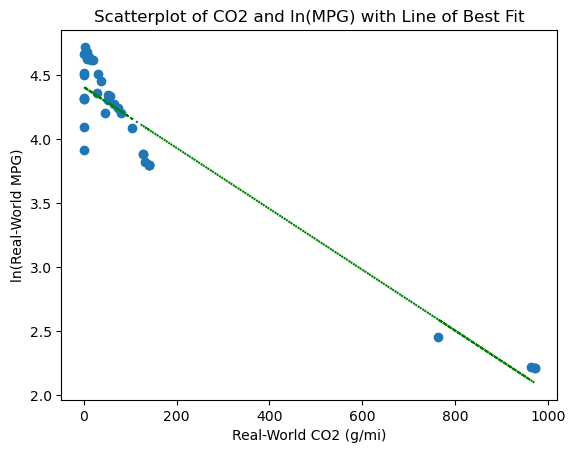

In [ ]:
#Create plot(s)/chart(s)

# Transform the y data
ln_y = np.log(cotwo_by_cfe_df['Real-World MPG'])

# Calculate the line of best fit on the transformed data
m, b = np.polyfit(cotwo_by_cfe_df['Real-World CO2 (g/mi)'], ln_y, 1)

# Create a scatterplot of C02 and combined fuel economy/real-world mpg
plt.scatter(cotwo_by_cfe_df['Real-World CO2 (g/mi)'], ln_y)

# Add the line of best fit as a red dotted line
plt.plot(cotwo_by_cfe_df['Real-World CO2 (g/mi)'], m*cotwo_by_cfe_df['Real-World CO2 (g/mi)'] + b, 'g:')

# Label the axes and add a title
plt.xlabel('Real-World CO2 (g/mi)')
plt.ylabel('ln(Real-World MPG)')
plt.title('Scatterplot of CO2 and ln(MPG) with Line of Best Fit')

plt.show()

In [ ]:
# Compute the correlation
correlation = cotwo_by_cfe_df['Real-World CO2 (g/mi)'].corr(cotwo_by_cfe_df['Real-World MPG'])

print("Correlation between 'Real-World CO2 (g/mi)' and 'Real-World MPG':", correlation)

Correlation between 'Real-World CO2 (g/mi)' and 'Real-World MPG': -0.7914720350726869
